# Exploratory Data Analysis

*Dataset*: https://www.kaggle.com/datasets/samxsam/human-cognitive-performance-analysis

In [1]:
# pip install pandas matplotlib seaborn numpy

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

## Loading Data & Initial Statistics

In [6]:
df = pd.read_csv("human_cognitive_performance.csv")

print("\n--- Data Overview ---")
print(f"Shape: {df.shape}")

print("\n--- Column Info ---")
print(df.info())


--- Data Overview ---
Shape: (80000, 13)

--- Column Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB
None


In [7]:
print("\n--- Missing Values ---")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n--- Summary Statistics ---")
print(df.describe())


--- Missing Values ---
Series([], dtype: int64)

--- Summary Statistics ---
                Age  Sleep_Duration  Stress_Level  Daily_Screen_Time  \
count  80000.000000    80000.000000  80000.000000       80000.000000   
mean      38.525525        7.005333      5.493762           6.504646   
std       12.101876        1.734435      2.865308           3.167072   
min       18.000000        4.000000      1.000000           1.000000   
25%       28.000000        5.500000      3.000000           3.800000   
50%       39.000000        7.000000      5.000000           6.500000   
75%       49.000000        8.500000      8.000000           9.200000   
max       59.000000       10.000000     10.000000          12.000000   

       Caffeine_Intake  Reaction_Time  Memory_Test_Score  Cognitive_Score  \
count     80000.000000   80000.000000       80000.000000     80000.000000   
mean        248.988213     399.973579          69.498350        58.172395   
std         144.541990     115.369329      

## Data Cleaning & Preprocessing

In [20]:
df_viz = df.drop(columns=['User_ID', 'AI_Predicted_Score'])

# Numerical Columns
num_cols = df_viz.select_dtypes(include=['float64', 'int64']).columns

print("--- Numerical Columns ---")
print(f"Columns: {num_cols}")

# Categorical Columns
cat_cols = df_viz.select_dtypes(include=['object', 'category']).columns

print("\n--- Categorical Columns ---")
print(f"Columns: {cat_cols}")

--- Numerical Columns ---
Columns: Index(['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time',
       'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score',
       'Cognitive_Score'],
      dtype='object')

--- Categorical Columns ---
Columns: Index(['Gender', 'Diet_Type', 'Exercise_Frequency'], dtype='object')


## Univariate Plots

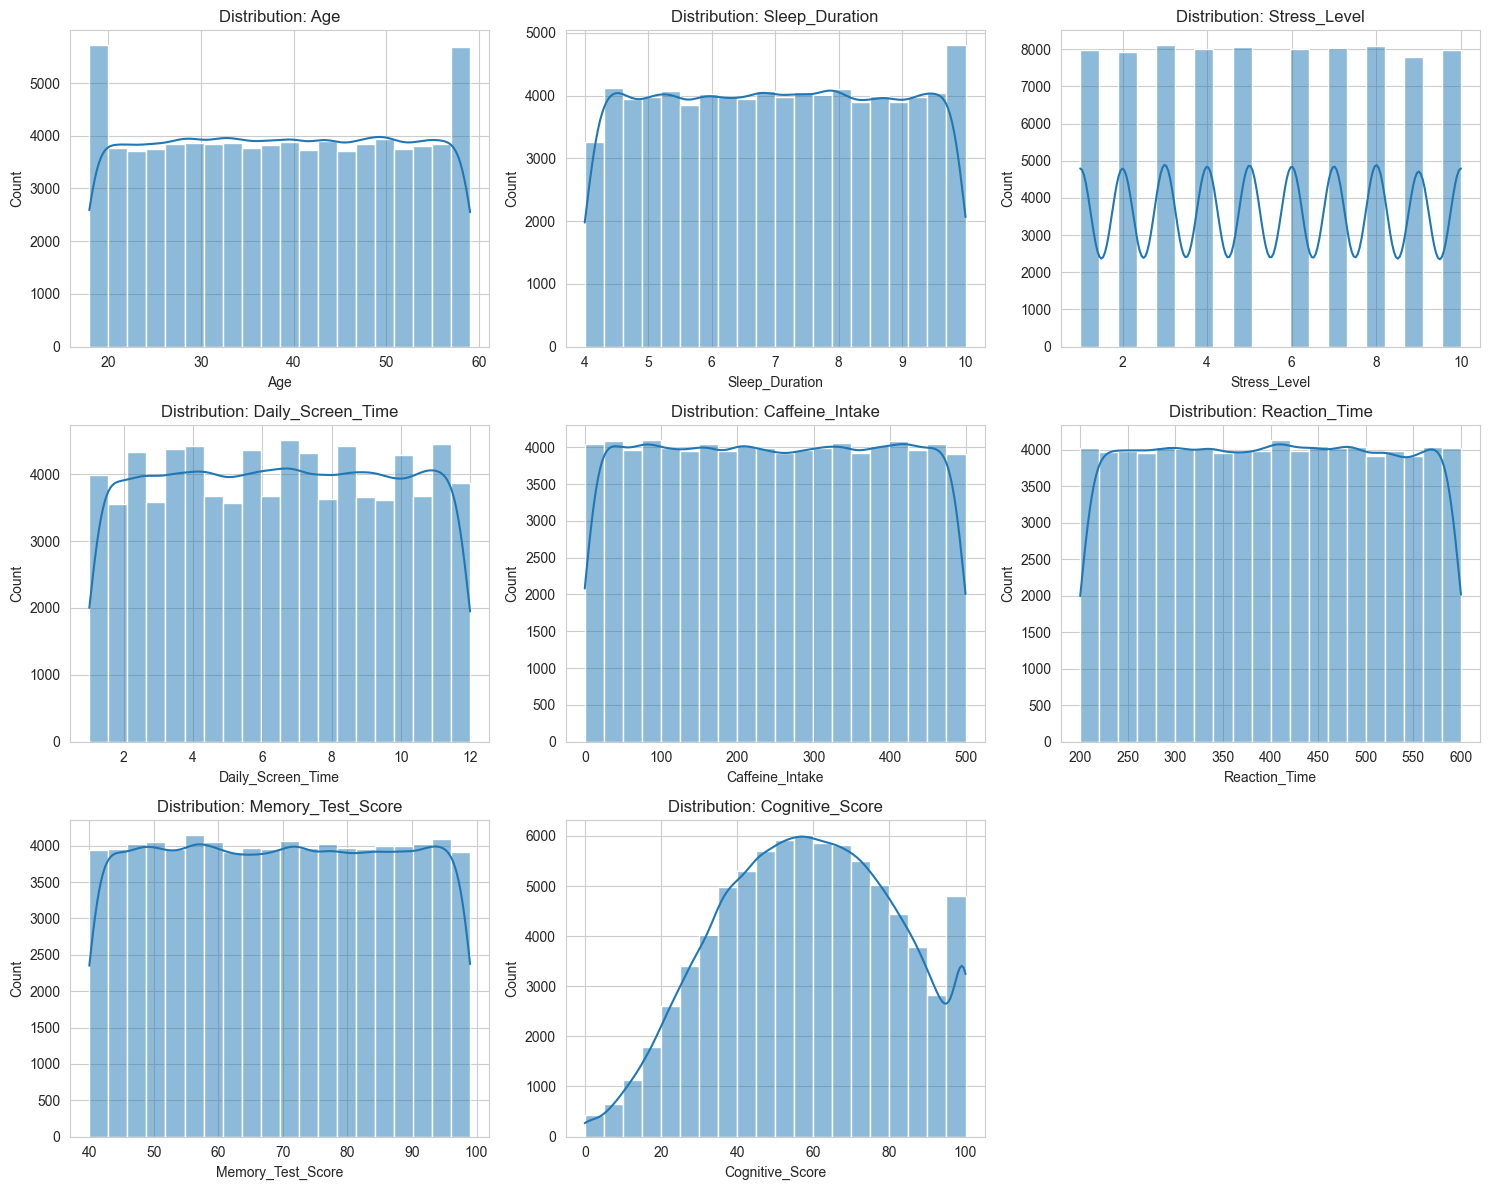

In [21]:
# Histograms with KDE
n_rows = (len(num_cols) + 2) // 3
plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, 3, i + 1)
    sns.histplot(df_viz[col], kde=True, bins=20)
    plt.title(f'Distribution: {col}')
plt.tight_layout()
plt.show()

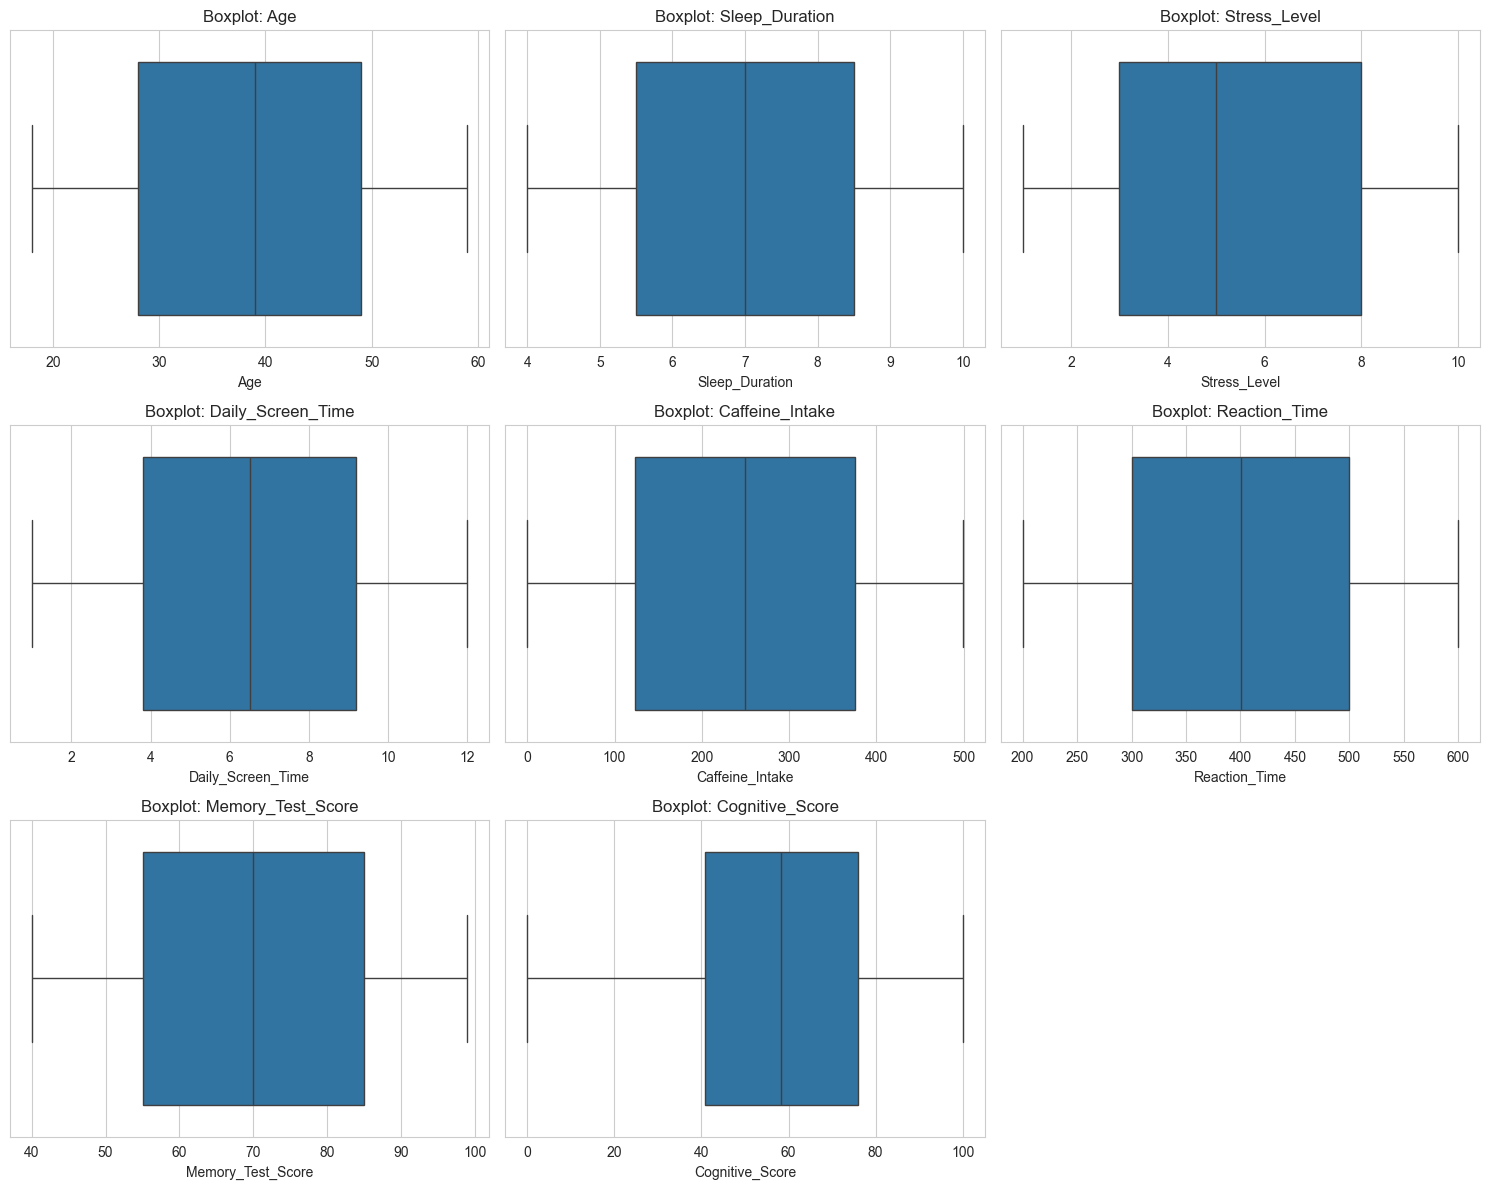

In [22]:
# Boxplots for Outlier Detection
plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(x=df_viz[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

### Categotical Columns

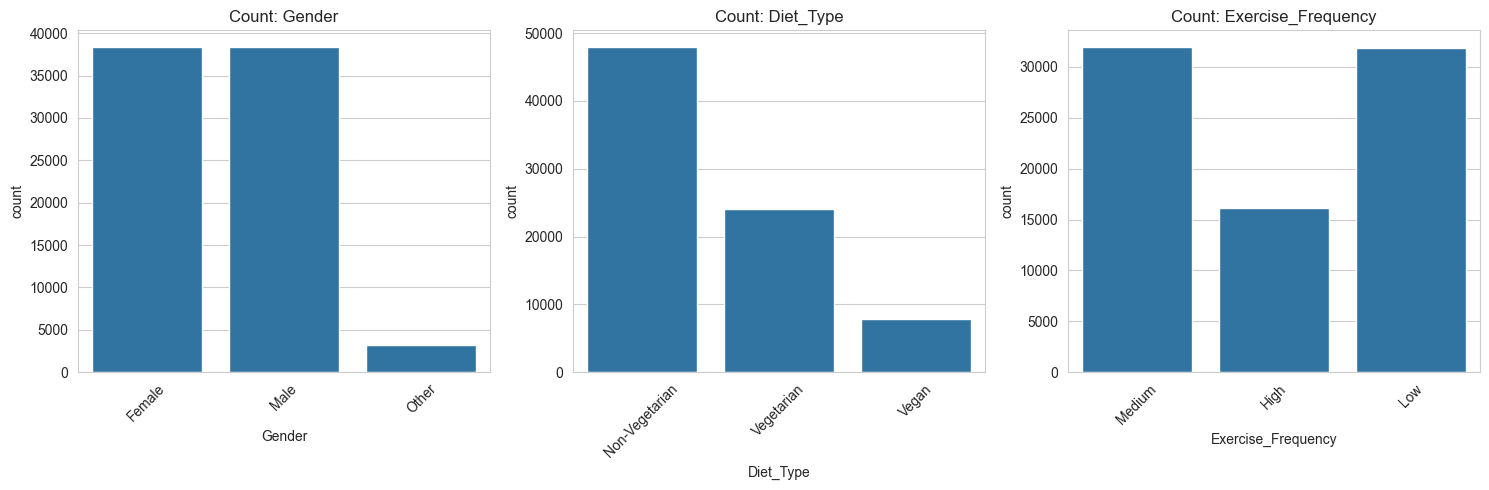

In [23]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(1, len(cat_cols), i + 1)
    sns.countplot(x=df_viz[col])
    plt.title(f'Count: {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bivariate Analysis - Correlations

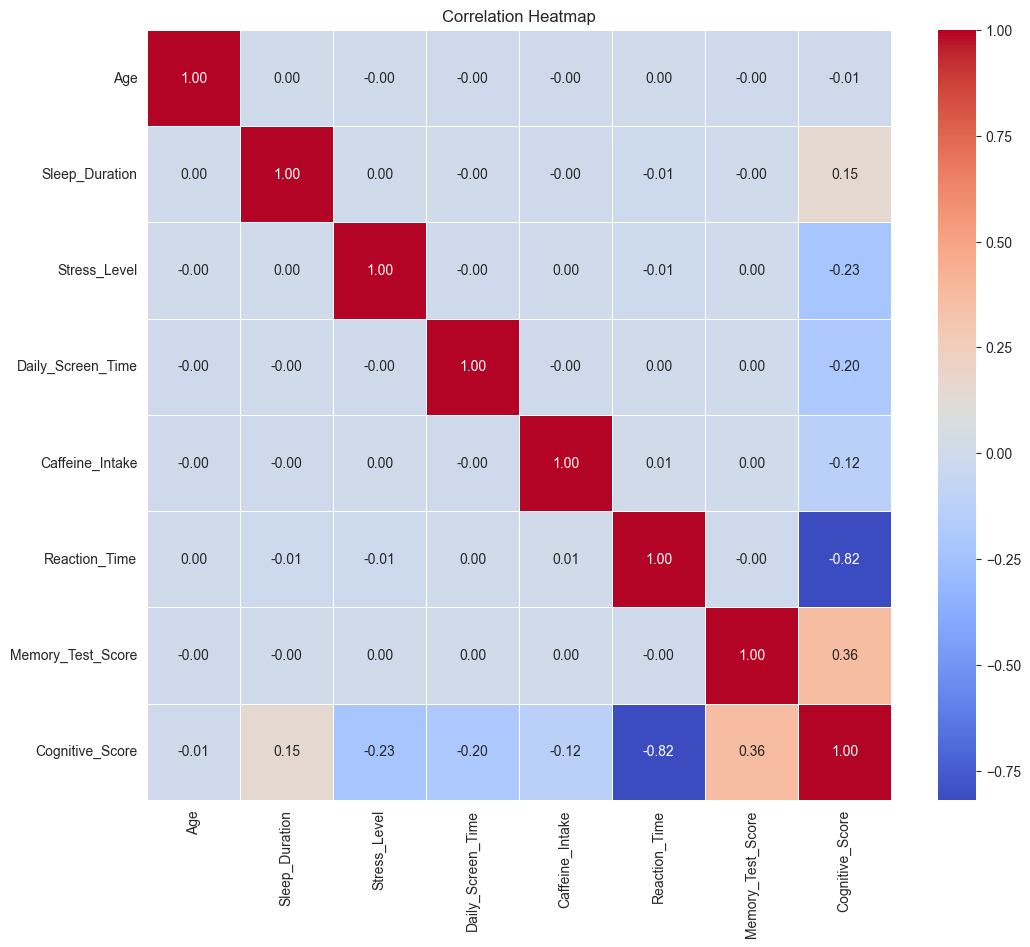

In [24]:
plt.figure(figsize=(12, 10))
corr_matrix = df_viz[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()